In [8]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import hvplot.pandas

In [9]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [10]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [11]:
# Get the information on the DataFrame
market_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [12]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data to normalize it
scaled_data = scaler.fit_transform(market_data_df)

# Convert scaled data into a DataFrame
scaled_market_data_df = pd.DataFrame(scaled_data, columns=market_data_df.columns, index=market_data_df.index)

# Display first 5 rows of scaled Dataframe
scaled_market_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [13]:
# Create a DataFrame with the scaled data
scaled_market_data_df = pd.DataFrame(scaled_data, columns=market_data_df.columns, index=market_data_df.index)

# Copy the crypto names from the original data
crypto_names = market_data_df.index

# Set the coinid column as index
scaled_market_data_df.index = crypto_names

# Display sample data
scaled_market_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [14]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(scaled_market_data_df)
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


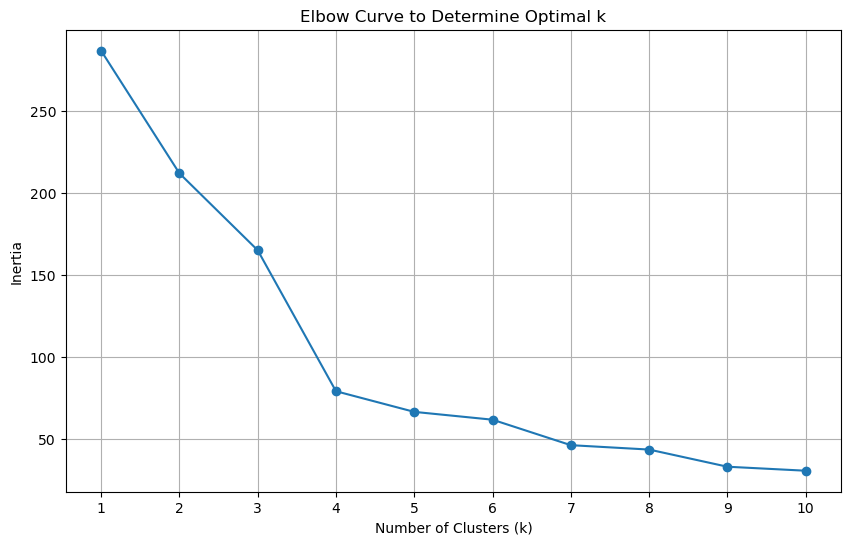

In [27]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_data["k"], elbow_data["inertia"], marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve to Determine Optimal k")
plt.xticks(elbow_data["k"])
plt.grid(True) # Added grid for better readability
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [28]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=1)

In [29]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_market_data_df)

KMeans(n_clusters=4, random_state=1)

In [30]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = kmeans.predict(scaled_market_data_df)

# View the resulting array of cluster values.
print(predicted_clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [31]:
# Create a copy of the DataFrame
clustered_data_df = scaled_market_data_df.copy()

In [32]:
# Add a new column to the DataFrame with the predicted clusters
clustered_data_df['Cluster'] = predicted_clusters

# Display sample data
clustered_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


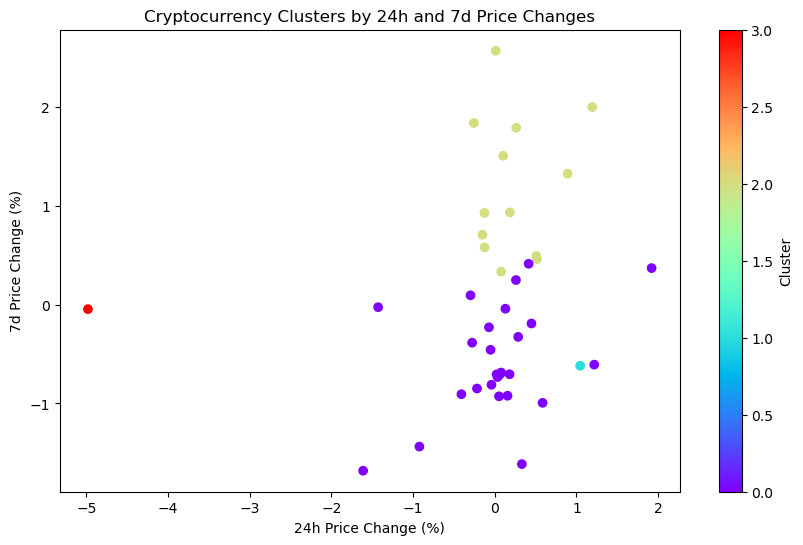

In [37]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
plt.figure(figsize=(10, 6))
plt.scatter(clustered_data_df['price_change_percentage_24h'], 
            clustered_data_df['price_change_percentage_7d'], 
            c=clustered_data_df['Cluster'], # Points colored based on cluster label
            cmap='rainbow')
plt.xlabel('24h Price Change (%)')
plt.ylabel('7d Price Change (%)')
plt.title('Cryptocurrency Clusters by 24h and 7d Price Changes')
plt.colorbar(label='Cluster')
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [46]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [47]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(scaled_market_data_df)

# Creating new DataFrame with the PCA data
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'], index=scaled_market_data_df.index)

# View the first five rows of the DataFrame. 
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [48]:
# Retrieve the explained variance to determine how much information can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_ # Showing the % of variance from each principal component.
explained_variance

array([0.3719856 , 0.34700813, 0.17603793])

In [49]:
# Total explained variance, the sum of the 3 arrays of explained_variance
total_explained_variance = explained_variance.sum()
total_explained_variance

0.895031657030984

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.5%

In [50]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'], index=scaled_market_data_df.index)

# Display sample data
pca_df.head(10)

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [51]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:
    kmeans = KMeans(n_clusters=k, random_state=1) # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans.fit(pca_df) # 2. Fit the model to the data using PCA DataFrame.
    inertia_values.append(kmeans.inertia_) # 3. Append the model.inertia_ to the inertia list

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582
5,6,34.507577
6,7,23.728365
7,8,18.574523
8,9,15.572672
9,10,11.407667


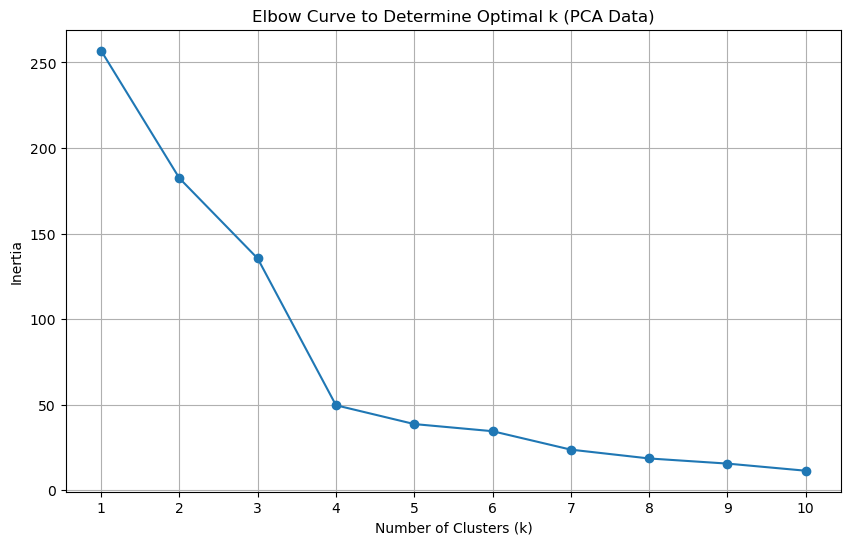

In [52]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_data["k"], elbow_data["inertia"], marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve to Determine Optimal k (PCA Data)")
plt.xticks(elbow_data["k"])
plt.grid(True)
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [53]:
# Initialize the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters=4, random_state=1)

In [54]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(pca_df)

KMeans(n_clusters=4, random_state=1)

In [55]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_clusters = kmeans_pca.predict(pca_df)

# Print the resulting array of cluster values.
print(pca_clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [56]:
# Create a copy of the DataFrame with the PCA data
pca_clustered_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_clustered_df['Cluster'] = pca_clusters

# Display sample data
pca_clustered_df.head()

,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [57]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
pca_clustered_df.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    c='Cluster',
    colormap='Category10',
    hover_cols=['coin_id'],
    size=100,
    title="Cryptocurrency Clusters by PCA Components"
)

:Scatter   [PC1]   (PC2,Cluster,coin_id)

### Determine the Weights of Each Feature on each Principal Component

In [61]:
# Use the columns from the original scaled DataFrame as the index.
components_df = pd.DataFrame(
    pca.components_, # PCA components
    columns=scaled_market_data_df.columns,  # Using original feature names for the columns
    index=['PC1', 'PC2', 'PC3']  # Setting index as principal components
)

components_df

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
PC1,-0.416728,-0.102432,-0.009162,0.191523,0.320365,0.594468,0.568379
PC2,0.358162,0.227432,0.540415,0.562182,0.434040,0.027735,-0.150789
PC3,-0.218795,0.787670,0.349534,-0.181744,-0.361377,0.039733,0.210541


0d` (-0.039733)
-0.039733)

    

In [62]:
# Display the features with the strongest positive and negative influence
for component in components_df.index:
    print(f"\n{component} - Features with Strongest Influence:")
    # Using sort_values to sort the features by absolute influence
    sorted_features = components_df.loc[component].abs().sort_values(ascending=False)
    # Finding the maximum value, with idxmax, for each of the PCA components
    print("Strongest Positive Influence:", sorted_features.idxmax(), "-", components_df.loc[component, sorted_features.idxmax()])
    # Finding the minimum value, with idxmin, for each of the PCA components
    print("Strongest Negative Influence:", sorted_features.idxmin(), "-", components_df.loc[component, sorted_features.idxmin()])


PC1 - Features with Strongest Influence:
Strongest Positive Influence: price_change_percentage_200d - 0.5944679804758315
Strongest Negative Influence: price_change_percentage_14d - -0.009162296546369852

PC2 - Features with Strongest Influence:
Strongest Positive Influence: price_change_percentage_30d - 0.5621822775288035
Strongest Negative Influence: price_change_percentage_200d - 0.027734745711440245

PC3 - Features with Strongest Influence:
Strongest Positive Influence: price_change_percentage_7d - 0.7876703041045966
Strongest Negative Influence: price_change_percentage_200d - 0.03973324689775176


#### Answer the following question:

**Question:** Which features have the strongest positive or negative influence on each component?

**Answer:**

- **PC1:**
  - **Strongest Positive Influence:** `price_change_percentage_200d` (0.594468)
  - **Strongest Negative Influence:** `price_change_percentage_14d` (-0.009162)

- **PC2:**
  - **Strongest Positive Influence:** `price_change_percentage_30d` (0.562182)
  - **Strongest Negative Influence:** `price_change_percentage_200d` (-0.027735)

- **PC3:**
  - **Strongest Positive Influence:** `price_change_percentage_7d` (0.787670)
  - **Strongest Negative Influence:** `price_change_percentage_200d` (-0.039733)
